In [1]:
import cv2
from PIL import Image
import pytesseract

In [2]:
from matplotlib import pyplot as plt

In [3]:
#https://stackoverflow.com/questions/28816046/
#displaying-different-images-with-actual-size-in-matplotlib-subplot
def display(im_path):
    dpi = 80
    im_data = plt.imread(im_path)

    height, width  = im_data.shape[:2]
    
    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(im_data, cmap='gray')

    plt.show()

In [4]:
#binerisation
def grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [5]:
def noise_removal(image):
    import numpy as np
    kernel = np.ones((1, 1), np.uint8)
    image = cv2.dilate(image, kernel, iterations=3)
    image = cv2.erode(image, kernel, iterations=3)
    image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)#for noice
    image = cv2.medianBlur(image, 3)#for noice
    return (image)

In [6]:
def thick_font(image):
    import numpy as np
    image = cv2.bitwise_not(image)
    kernel = np.ones((2,2),np.uint8)
    image = cv2.dilate(image, kernel, iterations=1)#difference
    image = cv2.bitwise_not(image)
    return (image)

In [8]:
noice="E:\ICG upskilling\OCR\\bw_image.jpg"
imgg=Image.open(noice)

In [9]:
ocrr=pytesseract.image_to_string(imgg)

In [10]:
print(ocrr)

“GABRIEL Meamall —

On Easter morning in the year 1944, I took my six-year~old
son by the hand and began walking from my home town toward the
valleys and forests of the Carpathian mountains... For nearly
eight months we livea in barns, attics and makeshift cabins. With
the generous help of an unusually courageous man, we managed to
survive Europe's greatest. fit of madness. Those who walked in
the opposite direction on that Easter day were less fortunate.
They were taken in trainloads to places whose once obscure names.
are now, and forever will be, synonymous with terror, evil and
death. What follows is our story of survival told to the best
of my ability, in plain, simple language.

In March of 1944 the SS troops took over the internal. affeirs
of Hungary and proceeded to organize the deportation of the Tews.
fo the Nazis this vas a routine assignment; within hours all leeal
efficials were informed of operational plans. The high commend
issted a directive designed to placate Jewish f

In [11]:
index="E:\ICG upskilling\OCR\index_02.JPG"

In [12]:
indeximage=Image.open(index)

In [13]:
ocrresult=pytesseract.image_to_string(indeximage)

In [14]:
print(ocrresult)

INDEX NOMINUM.

SCRIPSIT KAROLUS HAMPE.

Maior numerus indicat paginam, minor lineam.

A.v. E.

Aaron 38, 20. 123, 18. 168, 6. 203, 38. |

Abacue propheta 36, 5. 319,29. 373, 23.
Abagarus rex Edessenorum 382, 13.
Abdenago 585, 3.

Abel 26, 11.

Abigail 606, 6.

Abraham 26,18. 124,18. 133, 23, 2:
264. 302, 13. 303, 13. 320, 40. 328, 1.
496, 22.

Absalon 102, 5.

Acgfredi v. Ecgfridus.

Achab rex 504, 1.

Achaz rex 504,1.

Achiel 606, 19.

Achilon 496, 26.

Adal-, Adel-, Adhel-, Aedel-, Aedel-,
‘Aedil-, Aed
Athel-, Athil-, Aethel-, Aethil-
Ethel-.

Aedelbaldusabb.S. Petri Wiremuthen-
sis et S. Pauli Girwensis 110, 28.

Aedilberctus, Aedilberthus ep. Ha-
gulstadensis, antea ep. Candidae
casae sive Witernensis 27,43. 72,16.

Adalbertus, Aedilberctus sive Magus,
discipulus et capellanus Arnonis
archiep. Salisburg., postea_abb.
Ferrariensis 254, 1. 320, 41. 322, 19.
416. 418, 14. 422, 10.

Adalpertabb. [Tegernseensis ?]497,2.

Adalbertus presb. monasterii 8. Mar-
tini Turonensis 399, 3.

Aed

In [15]:
image = cv2.imread("E:\ICG upskilling\OCR\index_02.JPG")
base_image = image.copy()

In [16]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [18]:
cv2.imwrite("E:\ICG upskilling\OCR\iindex_gray.png", gray)

True

In [19]:
blur = cv2.GaussianBlur(gray, (7,7), 0)

In [20]:
thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

In [21]:
kernal = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 13))

In [22]:
dilate = cv2.dilate(thresh, kernal, iterations=1)

In [23]:
cnts = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [24]:
cnts = cnts[0] if len(cnts) == 2 else cents[1]

In [25]:
cnts = sorted(cnts, key=lambda x: cv2.boundingRect(x)[0])

In [26]:
results  = []
for c in cnts:
    x, y, w, h = cv2.boundingRect(c)
    if h > 200 and w > 20:
        roi = image[y:y+h, x:x+h]
        cv2.rectangle(image, (x, y), (x+w, y+h), (36, 255, 12), 2)
        ocr_result = pytesseract.image_to_string(roi)
        ocr_result = ocr_result.split("\n")
        for item in ocr_result:
            results.append(item)

In [28]:
print(results)

['A.v. E.', '', 'Abacuc propheta 36,5. 319, 29. 373, 23.', '', 'Abagarus rex Edessenorum 382, 13.', '', 'Abdenago 585, 3.', '', 'Abel 26, 11.', '', 'Abigail 606, 6.', '', 'Abraham 26,18, 124,18. 133, 23.', '', '264. 302, 13. 303, 13. 320, 40.', '', '496, 22.', '', 'Absalon 102, 5.', '', 'Acgfredi v. Ecgtridus.', '', 'Achab rex 504, 1.', '', 'Achaz rex 504, 1.', '', 'Achiel 606, 19.', '', 'Achilon 496, 26.', '', 'Adal-, Adel-, Adhel-, Aedel-, Aed', 'Aedil-, Aedil- Edel-, Edil-, Ath', '', 'Ethel-.', 'Aedelbaldusabb.S. Petri Wiremuthen-;', 'sis et S. Pauli Girwensis 110, 28.', "Aedilberctus, Aedilberthus ep. Ha-'", 'gulstadensis, antea ep. Candidae|', 'casae sive Witernensis 27,43. 72,16.', 'Adalbertus, Aedilberctus sive Magus,’', 'discipulus et capellanus Arnonis', 'archiep. Salisburg., postea_abb.', 'Ferrariensis 254, 1. 320, 41. 322, 19.)', '416. 418, 14. 422, 10.', 'Adalpertabb.[Tegernseensis ?]497,23..', 'Adalbertus presb. monasterii 8. Mar-', 'tini Turonensis 399, 3.', '', 'Aedilbur

In [33]:
entities = []
for item in results:
    item = item.strip().replace("\n", "")
    item = item.split(" ")[0]
    if len(item) > 2:
        if item[0] == "A" and "-" not in item:
            item = item.split(".")[0].replace(",", "").replace(";", "")
            entities.append(item)
cv2.imwrite("E:\ICG upskilling\OCR\index02.JPG",image)

True

In [30]:
print(entities)

['A', 'Abacuc', 'Abagarus', 'Abdenago', 'Abel', 'Abigail', 'Abraham', 'Absalon', 'Acgfredi', 'Achab', 'Achaz', 'Achiel', 'Achilon', 'Aedelbaldusabb', 'Aedilberctus', 'Adalbertus', 'Adalpertabb', 'Adalbertus', 'Aedilburga', 'Aethelfleda', 'Adalgarius', 'Adelgisa', 'Adalgisus', 'Aaron', 'Aethelhardus', 'Aedelhardus', 'Adelperga', 'Aedelredus', 'Aethilredus', 'Aedilthyda', 'Adhelricus', 'Aedilthyda', 'Aedelwaldus', 'Aedilthyda', 'Adalwinus', 'Aethiluuinus', 'Adam', 'Adam', 'Adaula', 'Adoredus', 'Adrianus', 'Adriaticum', 'Aegesippus', 'Aegil', 'Aegyptus', 'Aegyptiacascola', 'Aeine', 'Aelberhtus', 'Aelfvaldus', 'Aelim', 'Aeneades', 'Aesculapius', 'Aesne', 'Aethiopia', 'Africa', 'Africanus', 'Agar', 'Agareni', 'Agathensis', 'Aginus', 'Aethelhardus', 'Aedelhardus', 'Adalhardus', 'Adalmondus', 'Adelperga', 'Adalpert', 'Aedelredus', 'Aethilredus', 'Aedilthyda', 'Adhelricus', 'Aedilthyda', 'Aedelwaldus', 'Aedilthyda', 'Adalwinus', 'Aethiluuinus', 'Adam', 'Adam', 'Adaula', 'Adoredus', 'Adrianus',

In [31]:
entities = list(set(entities))

In [32]:

print (entities)

['Adalpertabb', 'Abdenago', 'Aedelredus', 'Achiel', 'Adalbertus', 'Aginus', 'Abigail', 'Aegil', 'Acgfredi', 'Adalmondus', 'Abagarus', 'Adalgisus', 'Aedelhardus', 'Aaron', 'Aedilthyda', 'Agar', 'Aedilburga', 'Adoredus', 'Aethelfleda', 'Abacuc', 'Agathensis', 'Adalgarius', 'Achilon', 'Adhelricus', 'Aeneades', 'Adrianus', 'Adelgisa', 'Adalwinus', 'Africanus', 'Aedelwaldus', 'Africa', 'Aegyptus', 'Aegyptiacascola', 'Agareni', 'Adalhardus', 'Aedelbaldusabb', 'Adaula', 'Aedilberctus', 'Aesne', 'Aethilredus', 'Aelberhtus', 'Aeine', 'Adalpert', 'Aelfvaldus', 'Absalon', 'Aethiopia', 'Adam', 'Aesculapius', 'A', 'Aethelhardus', 'Aegesippus', 'Abel', 'Adelperga', 'Abraham', 'Adriaticum', 'Achaz', 'Achab', 'Aelim', 'Aethiluuinus']


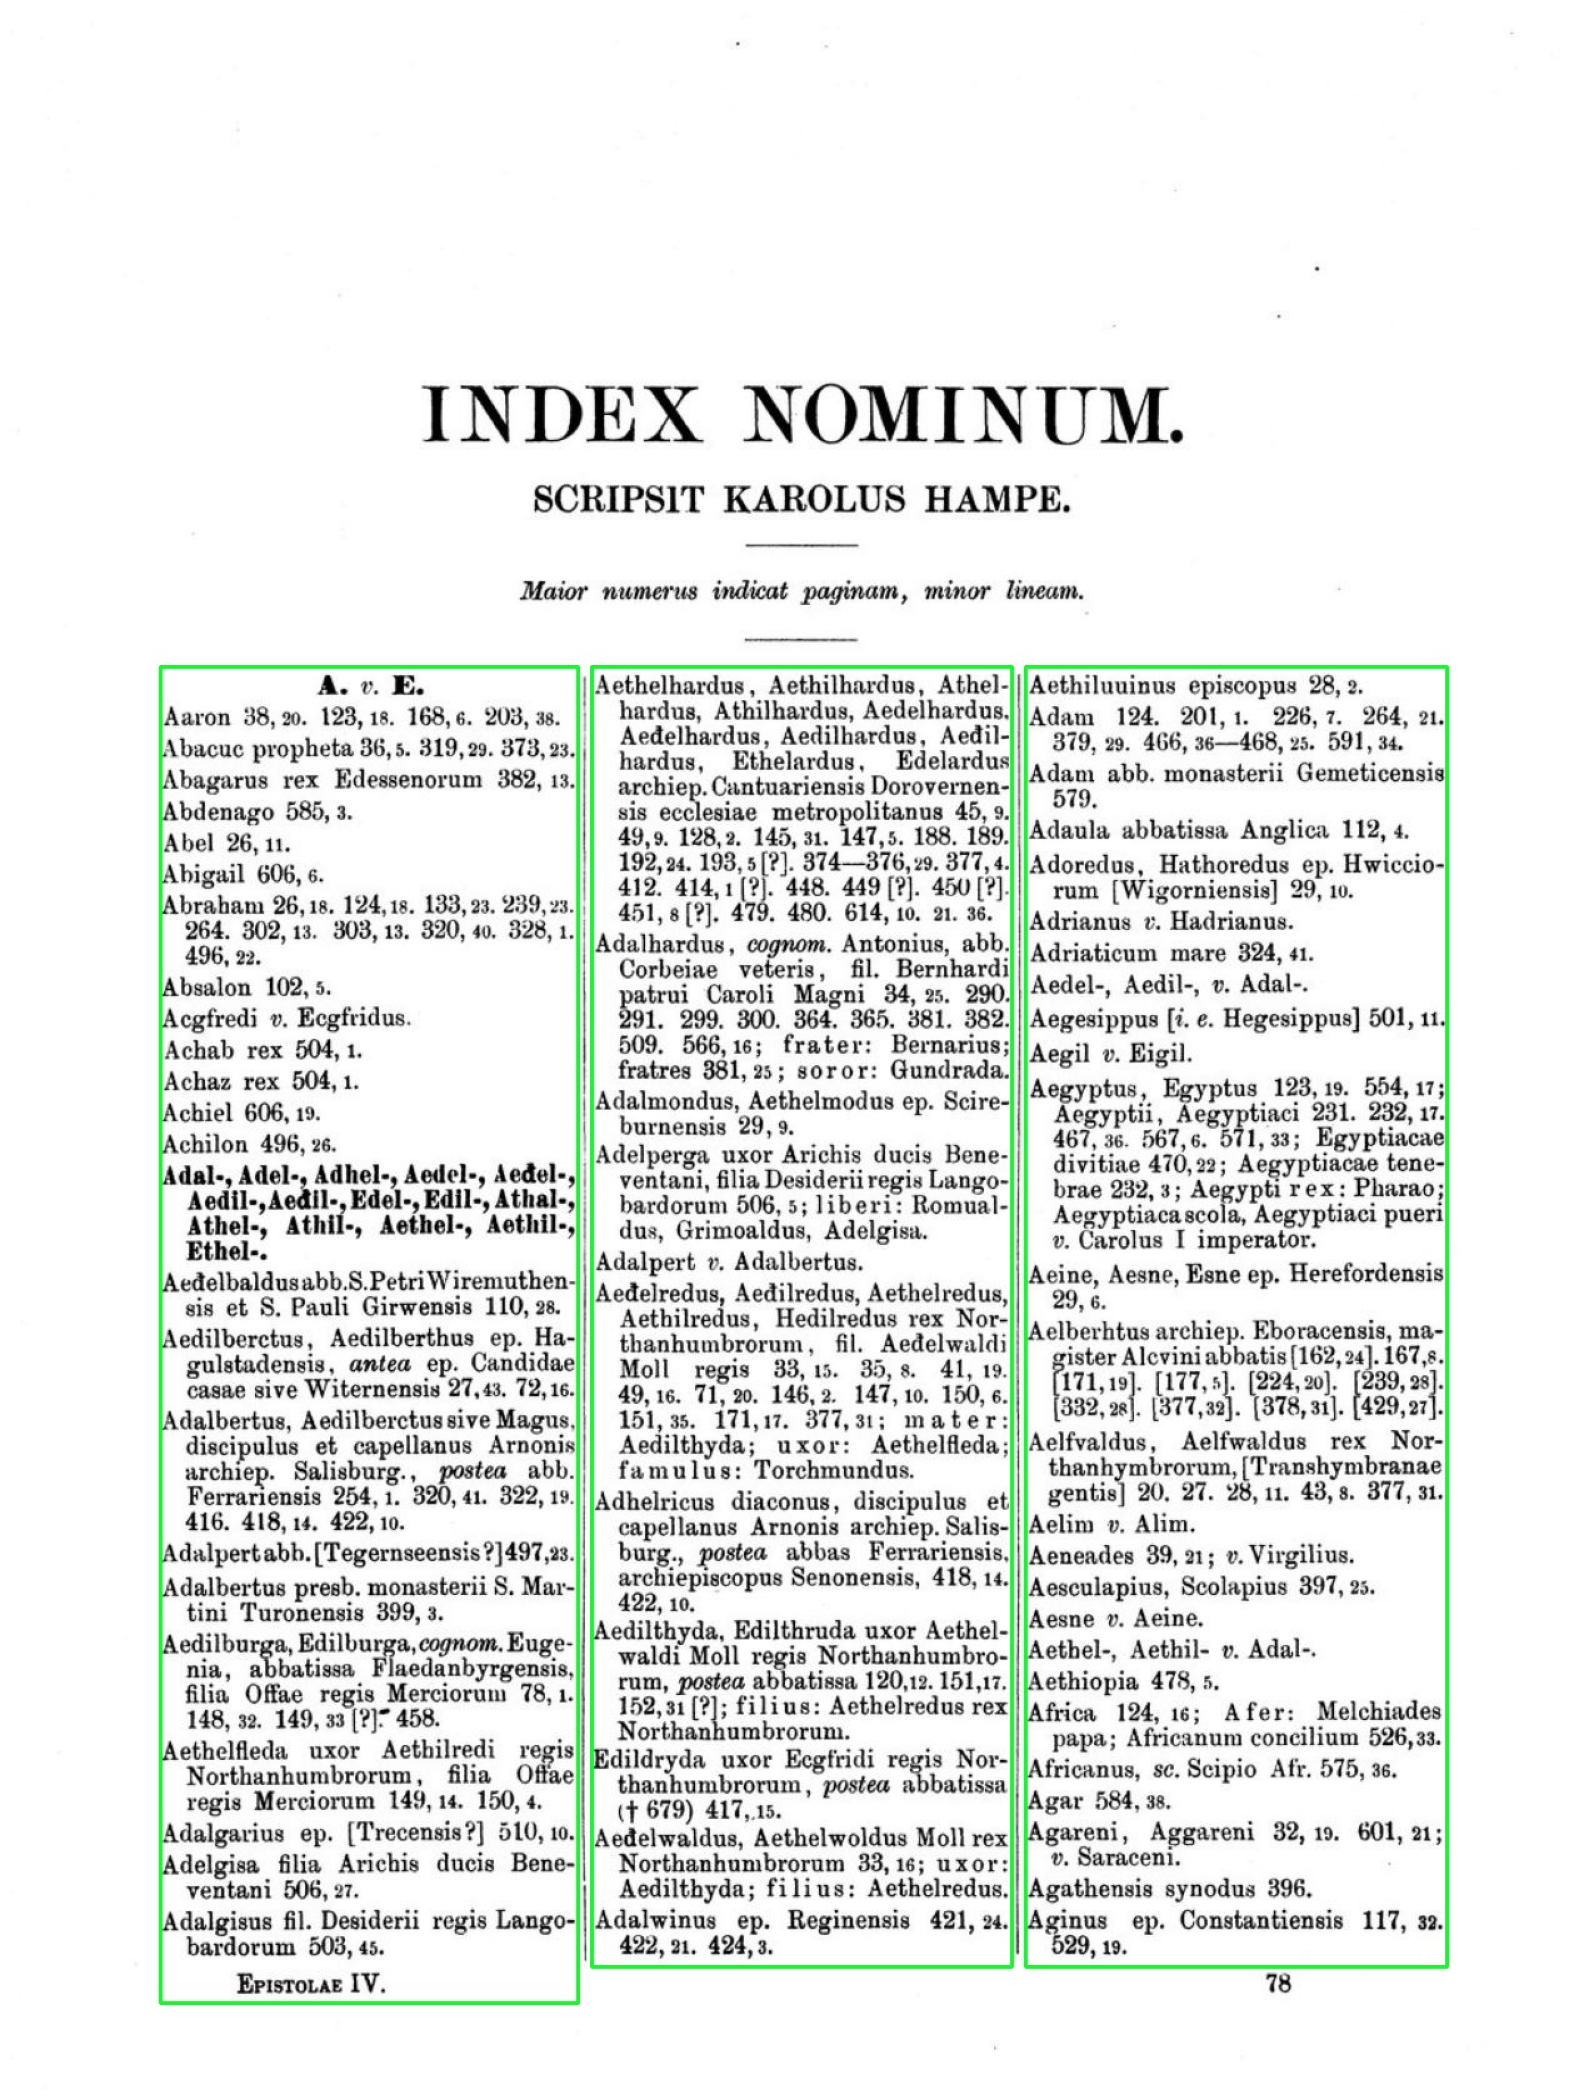

In [35]:
display('E:\ICG upskilling\OCR\index02.JPG')

In [36]:
new='E:\ICG upskilling\OCR\index02.JPG'
img = Image.open(new)

In [37]:
ocr_result = pytesseract.image_to_string(img)

In [38]:
print (ocr_result)

INDEX NOMINUM.

SCRIPSIT KAROLUS HAMPE.

Maior numerus indicat paginam, minor lineam.

A.v. E.

Aaron 38, 20. 123, 18. 168,6. 203, 38. |)

Abacuc propheta 36,5. 319,29. 373, 23.
bagarus rex Edessenorum 382, 13.)
Abdenago 586, 3.

braham 26,18, 124,18. 133, 23. 2:
264. 302, 13. 303,13. 320, 40. 328, 1.

Achilon 496, 26.
dal-, Adel-, Adhel-, Aedel-, Aedel-,
Aedil-, Aedil-, Edel-, Edil-, Athal-,
Athel-, Athil-, Aethel-, Aethil-.
Ethel-.
edelbaldusabb.S. Petri Wiremuthen.
sis et S. Pauli Girwensis 110, 28.
edilberctus, Aedilberthus ep. Ha.
gulstadensis, antea ep. Candidae’
casae sive Witernensis 27,43. 72,16.

Adalbertus, Aedilberctus sive Magus,
discipulus et capellanus Arnoni
archiep. Salisburg., postea_abb.
Ferrariensis 254, 1. 320, 41. 322, 19.)
416. 418, 14. 422, 10.
dalpertabb. [Tegernseensis ?}497,23.

Adalbertus presb. monasterii S. Mar-
tini Turonensis 399, 3.
edilburga, Edilburga, cognom. Euge-
nia, abbatissa Flaedanbyrgensis,
filia Offae regis Merciorum 78, 1.
148, 32. 149, 33 [